In [85]:
import cv2
from matplotlib import pyplot as plt

In [86]:
img = cv2.imread("data/solidWhiteCurve.jpg")
img  = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

In [87]:
print(img.shape)

(540, 960, 3)


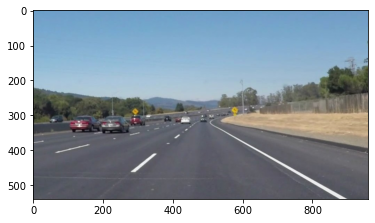

In [88]:
plt.imshow(img)
plt.savefig('images/img.png', transparent=True)

In [89]:
import numpy as np
def roi(img , vec):
    mask = np.zeros_like(img)
    if len(img.shape) == 3:
        mc = (255,) * img.shape[2]
    else:
        mc = 255
    cv2.fillPoly(mask, vec, mc)
    masked = cv2.bitwise_and(img, mask)
    return masked

In [90]:
gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)

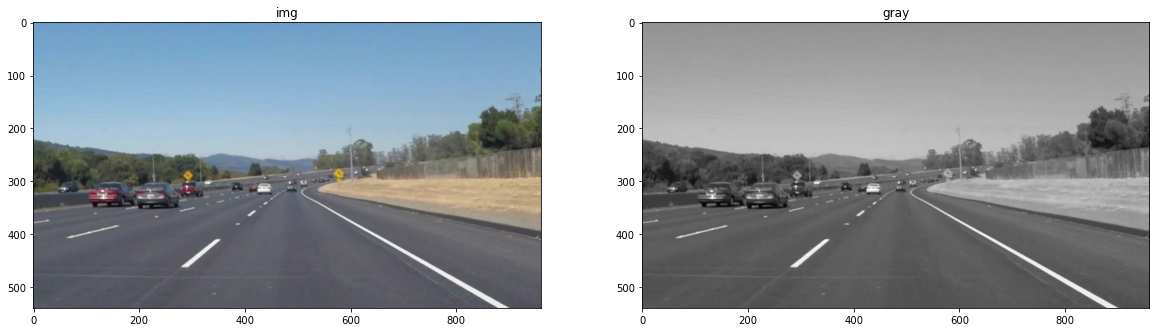

In [91]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("img")

plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
plt.title("gray")

plt.savefig('images/gray.png', transparent=True)

In [92]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

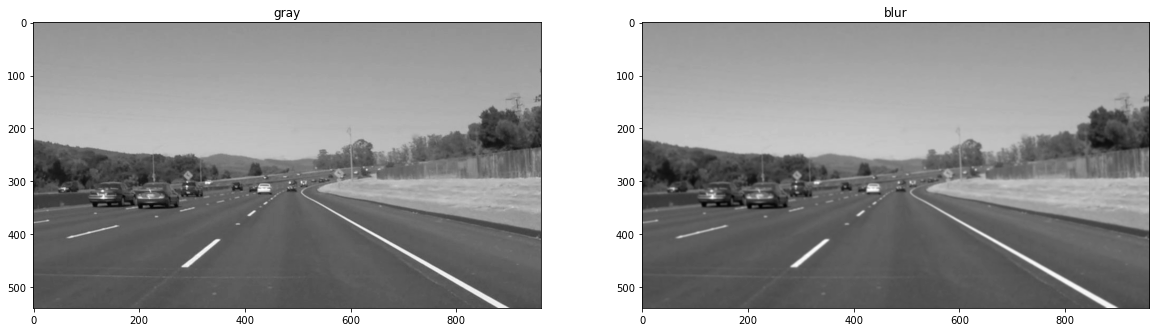

In [93]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("gray")

plt.subplot(1,2,2)
plt.imshow(blur, cmap="gray")
plt.title("blur")

plt.savefig('images/blur.png', transparent=True)

In [94]:
ci = cv2.Canny(gray, 200, 300)

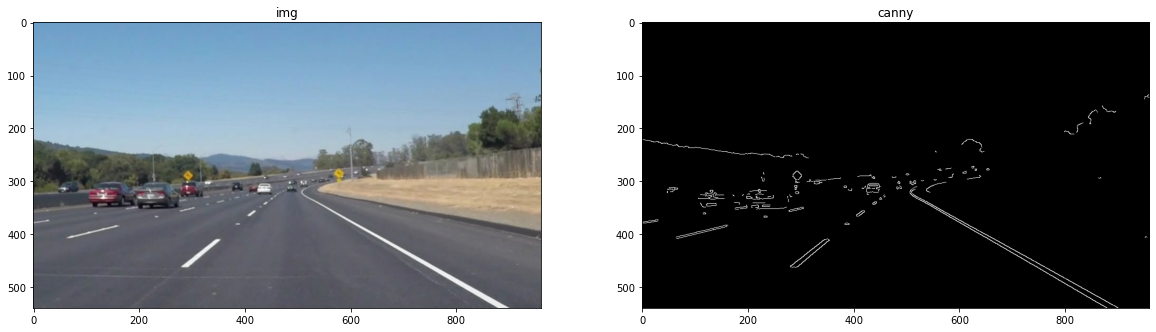

In [95]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("img")

plt.subplot(1,2,2)
plt.imshow(ci, cmap="gray")
plt.title("canny")

plt.savefig('images/canny.png', transparent=True)

In [96]:
height, width = img.shape[0:2]
imshape = img.shape
x_dim = np.shape(img)[1]
y_dim = np.shape(img)[0]
vertices = np.array([[(10,y_dim-50),(x_dim-10,y_dim-50),(x_dim/2+40,y_dim/1.65),(x_dim/2-40,y_dim/1.65)]],
                  dtype = np.int32)
rc = roi(ci, vertices)

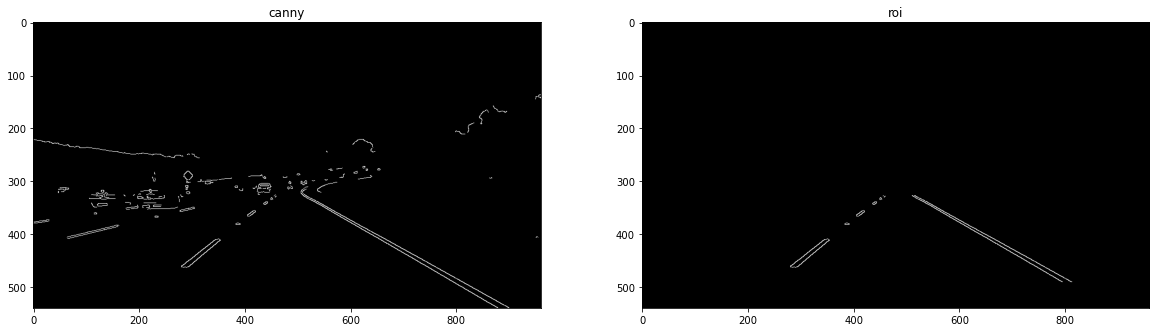

In [97]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(ci, cmap="gray")
plt.title("canny")


plt.subplot(1,2,2)
plt.imshow(rc, cmap="gray")
plt.title("roi")

plt.savefig('images/roi.png', transparent=True)

In [98]:
Lines = cv2.HoughLinesP(rc, rho=6, theta=np.pi/180,threshold=15, 
                        lines=np.array([]), minLineLength=10, maxLineGap=20)



In [99]:
print(Lines)

[[[616 382 654 404]]

 [[602 380 716 444]]

 [[322 427 345 410]]

 [[724 441 772 469]]

 [[757 468 782 484]]

 [[603 376 617 383]]

 [[290 463 353 412]]

 [[539 339 595 376]]

 [[732 455 747 462]]

 [[284 463 308 438]]

 [[527 333 542 345]]

 [[312 435 346 410]]

 [[778 471 797 483]]

 [[552 351 587 366]]

 [[391 382 450 331]]

 [[710 441 722 449]]

 [[738 457 760 471]]

 [[781 483 801 484]]

 [[744 452 788 478]]

 [[789 488 812 490]]

 [[596 371 604 381]]

 [[516 327 538 343]]

 [[384 380 458 330]]

 [[281 462 290 452]]

 [[675 414 685 421]]

 [[521 334 534 337]]

 [[439 344 459 328]]

 [[703 438 718 438]]

 [[700 428 731 454]]

 [[597 377 613 385]]

 [[285 463 301 456]]

 [[389 382 412 358]]

 [[282 462 297 447]]

 [[658 406 684 419]]

 [[787 487 808 488]]

 [[707 432 720 447]]

 [[547 348 580 362]]

 [[511 328 540 340]]

 [[283 462 302 455]]

 [[576 365 598 372]]

 [[701 436 713 435]]

 [[622 391 634 397]]

 [[292 451 308 450]]

 [[533 340 554 348]]

 [[689 430 711 434]]

 [[772 477

In [112]:
LineImg= np.zeros((rc.shape[0] , rc.shape[1], 3), dtype=np.uint8)

In [113]:
for cod in Lines:
    for x1, y1, x2, y2 in cod:
        cv2.line(LineImg, (x1, y1), (x2, y2), [255,255,0],2)

In [114]:
merged = np.copy(img)

In [115]:
merged = cv2.addWeighted(merged, 0.8, LineImg, 1.0, 0.0)

Text(0.5, 1.0, 'merged')

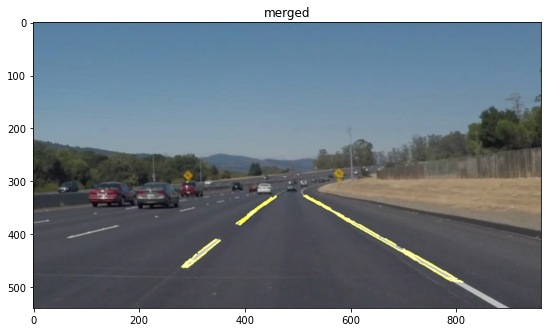

In [116]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(merged, cmap="gray")
plt.title("merged")

In [117]:
y_size = img.shape[0]
x_size = img.shape[1]
yL_n = 0
xL_n = 0
yR_n = 0
xR_n = 0
yL_n_1 = 5000
xL_n_1 = 0
yR_n_1 = 5000
xR_n_1 = 0
cutoff = 500
for cord in Lines:
    for x1,y1,x2,y2 in cord:
        if x1 < cutoff and x2 < cutoff and y1 > yL_n:
            yL_n = y1
            xL_n = x1
        if x1 < cutoff and x2 < cutoff and y2 > yL_n:
            yL_n = y2
            xL_n = x2
        if x1 < cutoff and x2 < cutoff and y1 < yL_n_1:
            yL_n_1 = y1
            xL_n_1 = x1
        if x1 < cutoff and x2 < cutoff and y2 < yL_n_1:
            yL_n_1 = y2
            xL_n_1 = x2

        if x1 > cutoff and x2 > cutoff and y1 > yR_n:
            yR_n = y1
            xR_n = x1
        if x1 > cutoff and x2 > cutoff and y2 > yR_n:
            yR_n = y2
            xR_n = x2
        if x1 > cutoff and x2 > cutoff and y1 < yR_n_1:
            yR_n_1 = y1
            xR_n_1 = x1
        if x1 > cutoff and x2 > cutoff and y2 < yR_n_1:
            yR_n_1 = y2
            xR_n_1 = x2


In [118]:
mL = (yL_n - yL_n_1) / (xL_n - xL_n_1)
mR = (yR_n - yR_n_1) / (xR_n - xR_n_1)

In [119]:
bL= (yL_n) - (mL*xL_n)
bR= (yR_n) - (mR*xR_n)

In [120]:
xLB = (y_size - bL) / mL
xRB = (y_size - bR) / mR

In [121]:
Li = np.zeros((img.shape[0] , img.shape[1], 3), dtype=np.uint8)

In [122]:
m = np.copy(img)

In [123]:
cv2.line(Li,(int(xLB), y_size),(xL_n_1, yL_n_1),(0,255,255),10)
cv2.line(Li,(int(xRB), y_size),(xR_n_1, yR_n_1),(0,255,255),10)
m = cv2.addWeighted(m, 0.8, Li, 1, 0)

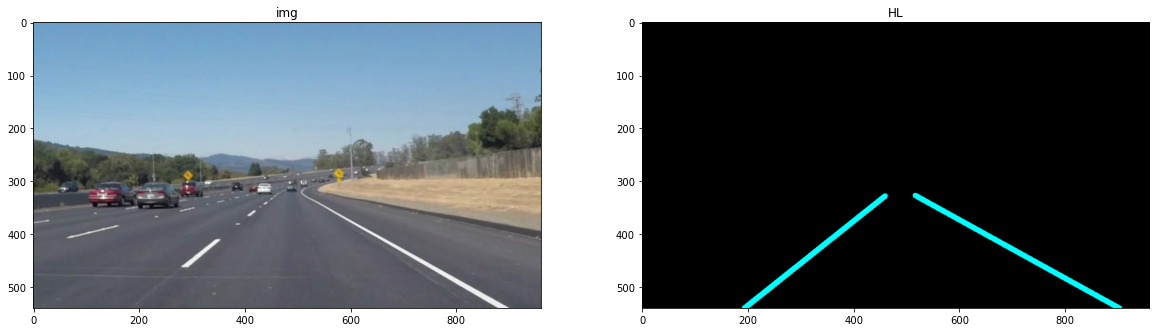

In [125]:
plt.figure(figsize=(20,20))

plt.subplot(1,2,2)
plt.imshow(Li, cmap="gray")
plt.title("HL")

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("img")

plt.savefig('images/HL-1.png', transparent=True)

In [126]:
m = cv2.addWeighted(m, 0.8, Li, 1.0, 0.0)

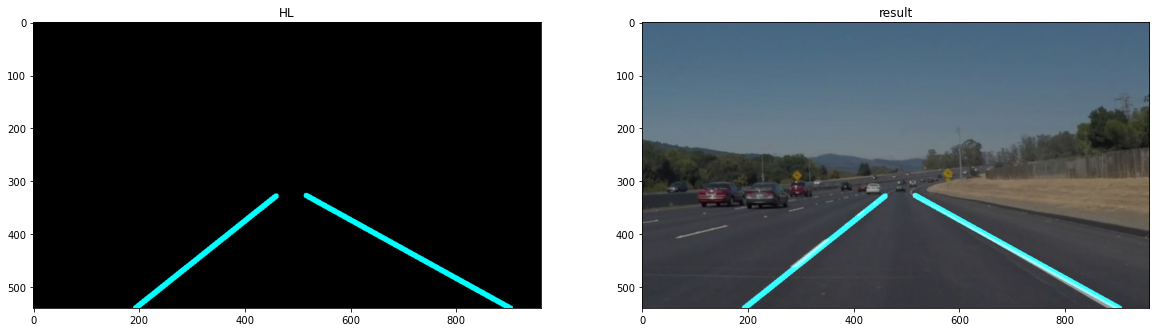

In [128]:
plt.figure(figsize=(20,20))


plt.subplot(1,2,1)
plt.imshow(Li, cmap="gray")
plt.title("HL")

plt.subplot(1,2,2)
plt.imshow(m, cmap="gray")
plt.title("result")
plt.savefig('images/HL-2.png', transparent=True)

In [188]:
cnt= 0

In [189]:
def pipe(img):
    global cnt
    #print(cnt)
    #cnt = cnt + 1
    height, width = img.shape[0:2]
    gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    ci = cv2.Canny(blur, 50, 150)
    
    height, width = img.shape[0:2]
    imshape = img.shape
    x_dim = np.shape(img)[1]
    y_dim = np.shape(img)[0]
    vertices = np.array([[(10,y_dim-50),(x_dim-10,y_dim-50),(x_dim/2+40,y_dim/1.65),(x_dim/2-40,y_dim/1.65)]],
                      dtype = np.int32)
    rc = roi(ci, vertices)
    Lines = cv2.HoughLinesP(rc, rho=2, theta=np.pi/180,threshold=15, 
                        lines=np.array([]), minLineLength=10, maxLineGap=20)

    y_size = img.shape[0]
    x_size = img.shape[1]
    yL_n = 0
    xL_n = 0
    yR_n = 0
    xR_n = 0
    yL_n_1 = 5000
    xL_n_1 = 0
    yR_n_1 = 5000
    xR_n_1 = 0
    cutoff = 500
    for cord in Lines:
        for x1,y1,x2,y2 in cord:
            if x1 < cutoff and x2 < cutoff and y1 > yL_n:
                yL_n = y1
                xL_n = x1
            if x1 < cutoff and x2 < cutoff and y2 > yL_n:
                yL_n = y2
                xL_n = x2
            if x1 < cutoff and x2 < cutoff and y1 < yL_n_1:
                yL_n_1 = y1
                xL_n_1 = x1
            if x1 < cutoff and x2 < cutoff and y2 < yL_n_1:
                yL_n_1 = y2
                xL_n_1 = x2

            if x1 > cutoff and x2 > cutoff and y1 > yR_n:
                yR_n = y1
                xR_n = x1
            if x1 > cutoff and x2 > cutoff and y2 > yR_n:
                yR_n = y2
                xR_n = x2
            if x1 > cutoff and x2 > cutoff and y1 < yR_n_1:
                yR_n_1 = y1
                xR_n_1 = x1
            if x1 > cutoff and x2 > cutoff and y2 < yR_n_1:
                yR_n_1 = y2
                xR_n_1 = x2
    
    m = np.copy(img)
    mL = (yL_n - yL_n_1) / (xL_n - xL_n_1)
    mR = (yR_n - yR_n_1) / (xR_n - xR_n_1)
    bL= (yL_n) - (mL*xL_n)
    bR= (yR_n) - (mR*xR_n)
    xLB = (y_size - bL) / mL
    xRB = (y_size - bR) / mR
    Li = np.zeros((img.shape[0] , img.shape[1], 3), dtype=np.uint8)
    cv2.line(Li,(int(xLB), y_size),(xL_n_1, yL_n_1),(0,255,255),10)
    cv2.line(Li,(int(xRB), y_size),(xR_n_1, yR_n_1),(0,255,255),10)
    
    frames = "frame %d" % cnt
    cv2.putText(Li, frames , (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cnt = cnt + 1


    
    m = cv2.addWeighted(m, 0.8, Li, 1, 0)
    m = cv2.addWeighted(m, 0.8, Li, 1, 0)
    return m

In [190]:
import os
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/local/bin/ffmpeg"

In [191]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [192]:
in1 = VideoFileClip("data/vids/solidWhiteRight.mp4")
frames = in1.fl_image(pipe)
frames.write_videofile("data/vids/solidWhiteRight_output.mp4", audio=False)

Moviepy - Building video data/vids/solidWhiteRight_output.mp4.
Moviepy - Writing video data/vids/solidWhiteRight_output.mp4



Moviepy - Done !
Moviepy - video ready data/vids/solidWhiteRight_output.mp4


In [62]:
import cv2
print(cv2.__version__)
vidcap = cv2.VideoCapture("data/vids/solidWhiteRight.mp4")
print(vidcap.read())
success,image = vidcap.read()
count = 0
success = True
while success:
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    #print(image)
    if image is not None:
        gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        ci = cv2.Canny(blur, 50, 150)
        cv2.imshow('window-name', )
        cv2.imwrite("junk/frame%d.jpg" % count, ci)
        count = count + 1
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        #print(ci)
vidcap.release()
cv2.destroyAllWindows() # destroy all opened windows

4.5.4-dev
(True, array([[[201, 161, 108],
        [201, 161, 108],
        [201, 161, 108],
        ...,
        [ 48,  41,  42],
        [ 46,  39,  40],
        [ 46,  39,  40]],

       [[201, 161, 108],
        [201, 161, 108],
        [201, 161, 108],
        ...,
        [ 48,  41,  42],
        [ 46,  39,  40],
        [ 46,  39,  40]],

       [[201, 161, 108],
        [201, 161, 108],
        [201, 161, 108],
        ...,
        [ 48,  41,  42],
        [ 47,  40,  41],
        [ 46,  39,  40]],

       ...,

       [[ 94,  83,  82],
        [ 94,  83,  82],
        [ 94,  83,  82],
        ...,
        [ 95,  88,  89],
        [ 95,  88,  89],
        [ 93,  86,  87]],

       [[ 94,  84,  79],
        [ 94,  84,  79],
        [ 93,  83,  77],
        ...,
        [ 95,  86,  87],
        [ 95,  86,  87],
        [ 93,  83,  84]],

       [[ 94,  84,  79],
        [ 94,  84,  79],
        [ 93,  83,  77],
        ...,
        [ 91,  82,  83],
        [ 91,  82,  83],
       

In [68]:
import numpy as np
import skvideo.io

out_video =  np.empty([10, 540, 960, 3], dtype = np.uint8)
out_video =  out_video.astype(np.uint8)

for i in range(9):
    img = cv2.imread("junk/frame" + str(i) + '.jpg')
    out_video[i] = img

# Writes the the output image sequences in a video file
skvideo.io.vwrite("video.mp4", out_video)